In [1]:
# Unzip provided mesh dataset
import os, zipfile

zip_path = "/content/8samples.zip"
extract_dir = "/content/unzipped_samples"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Unzipped dataset at:", extract_dir)
print("Contents:", os.listdir(extract_dir))


✅ Unzipped dataset at: /content/unzipped_samples
Contents: ['__MACOSX', '8samples']


In [2]:
!pip install -q open3d trimesh numpy matplotlib scikit-learn pandas
import numpy as np
import trimesh, open3d as o3d
import matplotlib.pyplot as plt
import pandas as pd
import os, zipfile
from sklearn.neighbors import NearestNeighbors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.5/736.5 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.0 MB/s eta 0:00:00


In [3]:
base_dir = "/content/Mesh_Assignment_Submission"
mesh_dir = os.path.join(base_dir, "output_meshes")
viz_dir = os.path.join(base_dir, "visualizations")
os.makedirs(mesh_dir, exist_ok=True)
os.makedirs(viz_dir, exist_ok=True)

print(f"✅ Output directories created:\n{mesh_dir}\n{viz_dir}")


✅ Output directories created:
/content/Mesh_Assignment_Submission/output_meshes
/content/Mesh_Assignment_Submission/visualizations


#Task 1: Load and Inspect Meshes

Found 8 meshes.

📂 Loaded: /content/unzipped_samples/8samples/person.obj
Vertices: 3103
X[min,max,mean,std]: -0.8438, 0.8418, 0.0049, 0.3951
Y[min,max,mean,std]: -0.0000, 1.9004, 1.1595, 0.5119
Z[min,max,mean,std]: -0.2129, 0.2109, -0.0036, 0.0951


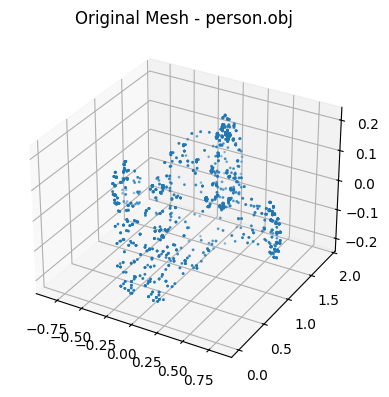


📂 Loaded: /content/unzipped_samples/8samples/talwar.obj
Vertices: 1668
X[min,max,mean,std]: -0.0319, 0.0319, 0.0217, 0.0112
Y[min,max,mean,std]: 0.0000, 1.0000, 0.3028, 0.2369
Z[min,max,mean,std]: -0.1171, 0.1171, -0.0044, 0.0468



📂 Loaded: /content/unzipped_samples/8samples/table.obj
Vertices: 3148
X[min,max,mean,std]: -0.2089, 0.2089, -0.0132, 0.1531
Y[min,max,mean,std]: -0.0000, 0.6118, 0.3864, 0.1919
Z[min,max,mean,std]: -0.5000, 0.5000, -0.0036, 0.3461


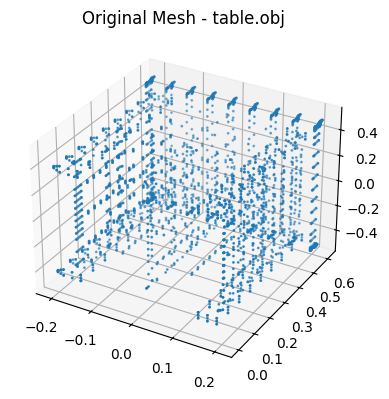


📂 Loaded: /content/unzipped_samples/8samples/explosive.obj
Vertices: 2812
X[min,max,mean,std]: -0.1996, 0.1996, 0.0429, 0.1151
Y[min,max,mean,std]: -0.0000, 1.0000, 0.5291, 0.3899
Z[min,max,mean,std]: -0.1971, 0.1971, -0.0034, 0.0947



📂 Loaded: /content/unzipped_samples/8samples/cylinder.obj
Vertices: 192
X[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 0.7071
Y[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 1.0000
Z[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 0.7071



📂 Loaded: /content/unzipped_samples/8samples/branch.obj
Vertices: 2767
X[min,max,mean,std]: -0.8516, 0.8496, 0.0754, 0.3434
Y[min,max,mean,std]: 0.0000, 1.9004, 1.0874, 0.4570
Z[min,max,mean,std]: -0.4648, 0.4629, 0.1220, 0.2001



📂 Loaded: /content/unzipped_samples/8samples/fence.obj
Vertices: 1088
X[min,max,mean,std]: -0.5000, 0.5000, -0.0035, 0.3458
Y[min,max,mean,std]: -0.0000, 0.8432, 0.4105, 0.2540
Z[min,max,mean,std]: -0.0225, 0.0225, -0.0004, 0.0110



📂 Loaded: /content/unzipped_samples/8samples/girl.obj
Vertices: 8284
X[min,max,mean,std]: -0.5000, 0.5000, 0.0021, 0.1788
Y[min,max,mean,std]: 0.0000, 0.9044, 0.4034, 0.2144
Z[min,max,mean,std]: -0.1814, 0.1814, 0.0140, 0.0618


In [4]:
def load_mesh(path):
    mesh = trimesh.load(path, force='mesh')
    vertices = np.array(mesh.vertices)
    print(f"\n📂 Loaded: {path}")
    print(f"Vertices: {len(vertices)}")
    print(f"X[min,max,mean,std]: {vertices[:,0].min():.4f}, {vertices[:,0].max():.4f}, {vertices[:,0].mean():.4f}, {vertices[:,0].std():.4f}")
    print(f"Y[min,max,mean,std]: {vertices[:,1].min():.4f}, {vertices[:,1].max():.4f}, {vertices[:,1].mean():.4f}, {vertices[:,1].std():.4f}")
    print(f"Z[min,max,mean,std]: {vertices[:,2].min():.4f}, {vertices[:,2].max():.4f}, {vertices[:,2].mean():.4f}, {vertices[:,2].std():.4f}")
    return mesh, vertices

def visualize(vertices, title, save_path):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], s=1)
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(save_path, dpi=150)
    plt.show()
    plt.close(fig)

input_path = os.path.join(extract_dir, "8samples")
meshes = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith(".obj")]
print(f"Found {len(meshes)} meshes.")

for m in meshes:
    mesh, verts = load_mesh(m)
    visualize(verts, f"Original Mesh - {os.path.basename(m)}",
              os.path.join(viz_dir, f"{os.path.basename(m)}_original.png"))


#Task 2: Normalization & Quantization


📂 Loaded: /content/unzipped_samples/8samples/person.obj
Vertices: 3103
X[min,max,mean,std]: -0.8438, 0.8418, 0.0049, 0.3951
Y[min,max,mean,std]: -0.0000, 1.9004, 1.1595, 0.5119
Z[min,max,mean,std]: -0.2129, 0.2109, -0.0036, 0.0951


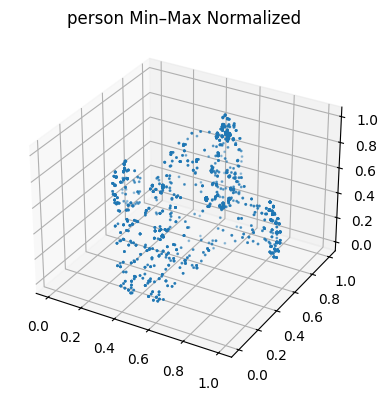

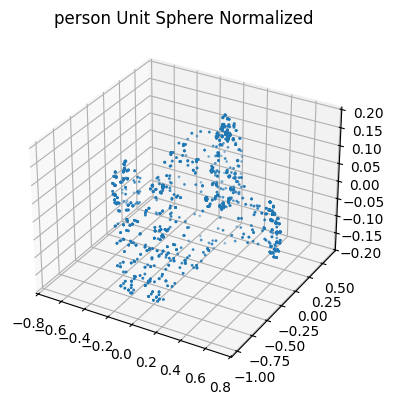


📂 Loaded: /content/unzipped_samples/8samples/talwar.obj
Vertices: 1668
X[min,max,mean,std]: -0.0319, 0.0319, 0.0217, 0.0112
Y[min,max,mean,std]: 0.0000, 1.0000, 0.3028, 0.2369
Z[min,max,mean,std]: -0.1171, 0.1171, -0.0044, 0.0468


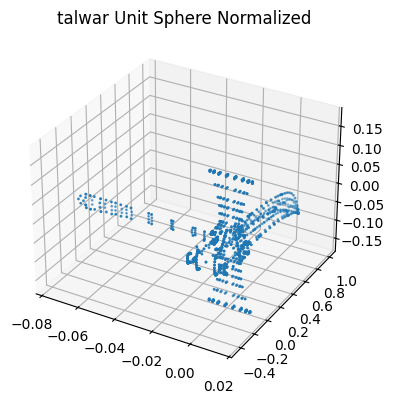


📂 Loaded: /content/unzipped_samples/8samples/table.obj
Vertices: 3148
X[min,max,mean,std]: -0.2089, 0.2089, -0.0132, 0.1531
Y[min,max,mean,std]: -0.0000, 0.6118, 0.3864, 0.1919
Z[min,max,mean,std]: -0.5000, 0.5000, -0.0036, 0.3461


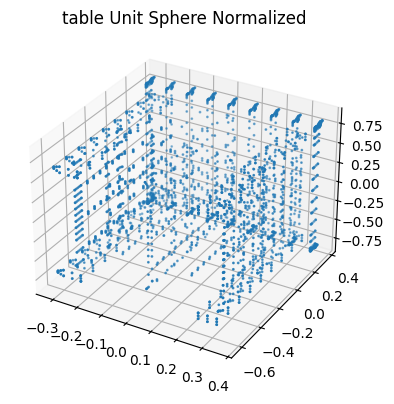


📂 Loaded: /content/unzipped_samples/8samples/explosive.obj
Vertices: 2812
X[min,max,mean,std]: -0.1996, 0.1996, 0.0429, 0.1151
Y[min,max,mean,std]: -0.0000, 1.0000, 0.5291, 0.3899
Z[min,max,mean,std]: -0.1971, 0.1971, -0.0034, 0.0947



📂 Loaded: /content/unzipped_samples/8samples/cylinder.obj
Vertices: 192
X[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 0.7071
Y[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 1.0000
Z[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 0.7071


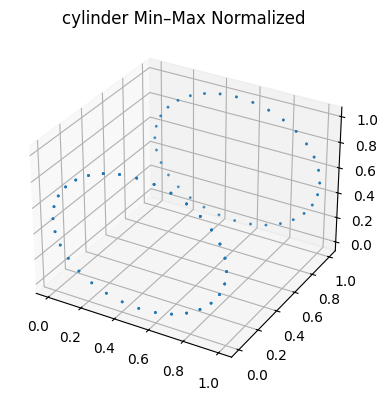


📂 Loaded: /content/unzipped_samples/8samples/branch.obj
Vertices: 2767
X[min,max,mean,std]: -0.8516, 0.8496, 0.0754, 0.3434
Y[min,max,mean,std]: 0.0000, 1.9004, 1.0874, 0.4570
Z[min,max,mean,std]: -0.4648, 0.4629, 0.1220, 0.2001


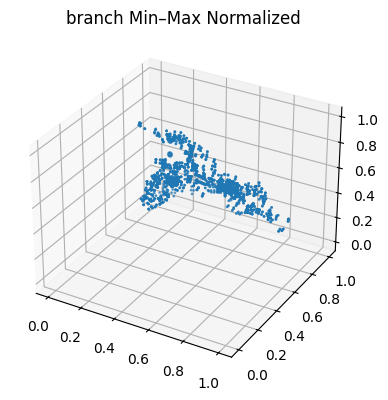

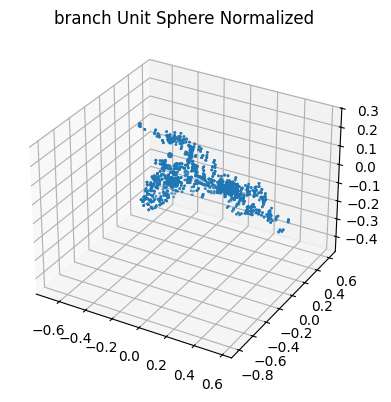


📂 Loaded: /content/unzipped_samples/8samples/fence.obj
Vertices: 1088
X[min,max,mean,std]: -0.5000, 0.5000, -0.0035, 0.3458
Y[min,max,mean,std]: -0.0000, 0.8432, 0.4105, 0.2540
Z[min,max,mean,std]: -0.0225, 0.0225, -0.0004, 0.0110



📂 Loaded: /content/unzipped_samples/8samples/girl.obj
Vertices: 8284
X[min,max,mean,std]: -0.5000, 0.5000, 0.0021, 0.1788
Y[min,max,mean,std]: 0.0000, 0.9044, 0.4034, 0.2144
Z[min,max,mean,std]: -0.1814, 0.1814, 0.0140, 0.0618


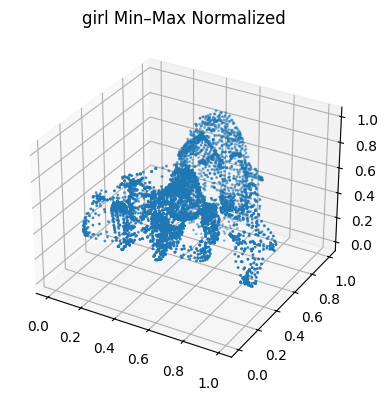

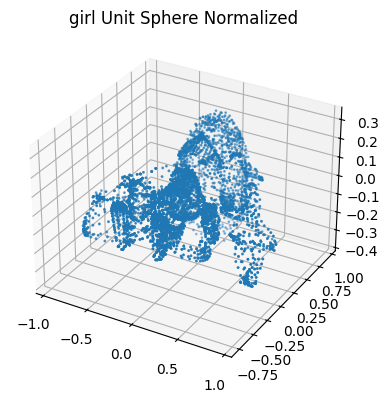

In [5]:
def minmax_normalize(vertices):
    vmin, vmax = vertices.min(0), vertices.max(0)
    return (vertices - vmin) / (vmax - vmin), vmin, vmax

def unit_sphere_normalize(vertices):
    center = vertices.mean(0)
    v_centered = vertices - center
    scale = np.linalg.norm(v_centered, axis=1).max()
    return v_centered / scale, center, scale

def quantize(norm_vertices, n_bins=1024):
    q = np.floor(norm_vertices * (n_bins - 1)).astype(np.int32)
    return q

def save_mesh(vertices, filename):
    mesh = o3d.geometry.PointCloud()
    mesh.points = o3d.utility.Vector3dVector(vertices)
    o3d.io.write_point_cloud(filename, mesh)

for m in meshes:
    mesh, verts = load_mesh(m)
    name = os.path.splitext(os.path.basename(m))[0]

    # Min–Max
    v_norm, vmin, vmax = minmax_normalize(verts)
    v_quant = quantize(v_norm)
    save_mesh(v_quant, os.path.join(mesh_dir, f"{name}_minmax_quantized.ply"))
    visualize(v_norm, f"{name} Min–Max Normalized", os.path.join(viz_dir, f"{name}_minmax_norm.png"))

    # Unit Sphere
    v_norm2, center, scale = unit_sphere_normalize(verts)
    v_quant2 = quantize((v_norm2 + 1)/2)
    save_mesh(v_quant2, os.path.join(mesh_dir, f"{name}_unitsphere_quantized.ply"))
    visualize(v_norm2, f"{name} Unit Sphere Normalized", os.path.join(viz_dir, f"{name}_unitsphere_norm.png"))


#Task 3: Reconstruction & Error Analysis


📂 Loaded: /content/unzipped_samples/8samples/person.obj
Vertices: 3103
X[min,max,mean,std]: -0.8438, 0.8418, 0.0049, 0.3951
Y[min,max,mean,std]: -0.0000, 1.9004, 1.1595, 0.5119
Z[min,max,mean,std]: -0.2129, 0.2109, -0.0036, 0.0951


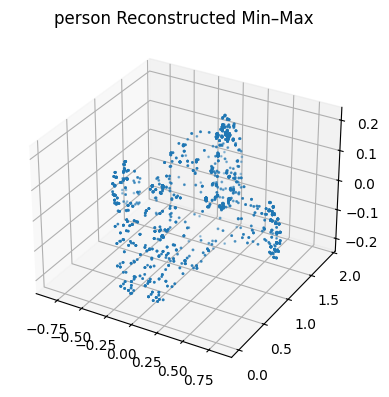

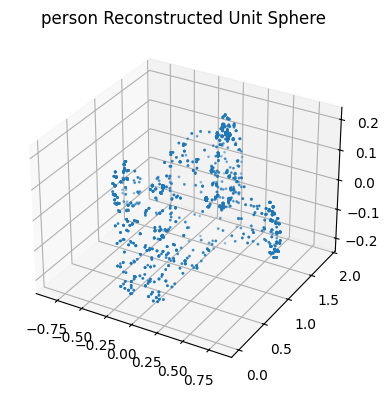


📂 Loaded: /content/unzipped_samples/8samples/talwar.obj
Vertices: 1668
X[min,max,mean,std]: -0.0319, 0.0319, 0.0217, 0.0112
Y[min,max,mean,std]: 0.0000, 1.0000, 0.3028, 0.2369
Z[min,max,mean,std]: -0.1171, 0.1171, -0.0044, 0.0468


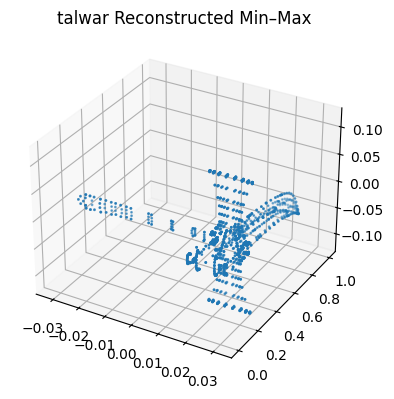

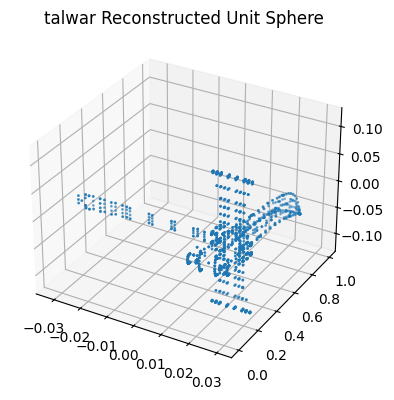


📂 Loaded: /content/unzipped_samples/8samples/table.obj
Vertices: 3148
X[min,max,mean,std]: -0.2089, 0.2089, -0.0132, 0.1531
Y[min,max,mean,std]: -0.0000, 0.6118, 0.3864, 0.1919
Z[min,max,mean,std]: -0.5000, 0.5000, -0.0036, 0.3461


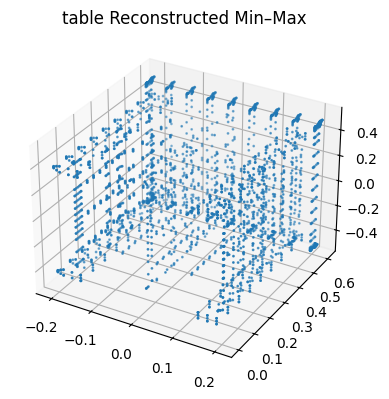

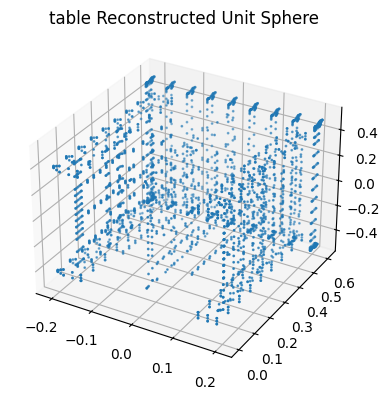


📂 Loaded: /content/unzipped_samples/8samples/explosive.obj
Vertices: 2812
X[min,max,mean,std]: -0.1996, 0.1996, 0.0429, 0.1151
Y[min,max,mean,std]: -0.0000, 1.0000, 0.5291, 0.3899
Z[min,max,mean,std]: -0.1971, 0.1971, -0.0034, 0.0947


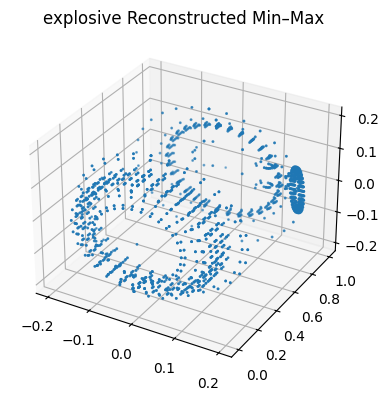

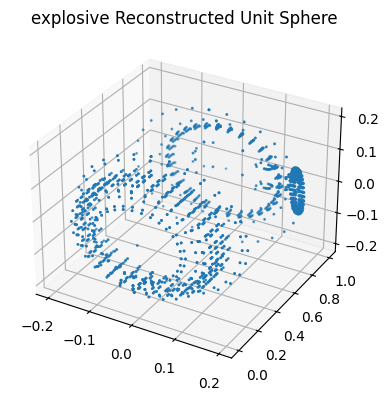


📂 Loaded: /content/unzipped_samples/8samples/cylinder.obj
Vertices: 192
X[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 0.7071
Y[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 1.0000
Z[min,max,mean,std]: -1.0000, 1.0000, 0.0000, 0.7071


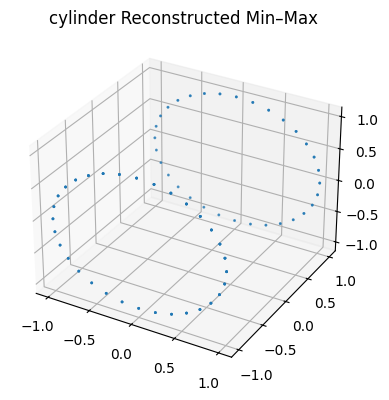

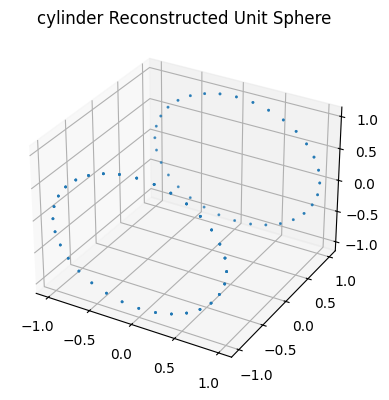


📂 Loaded: /content/unzipped_samples/8samples/branch.obj
Vertices: 2767
X[min,max,mean,std]: -0.8516, 0.8496, 0.0754, 0.3434
Y[min,max,mean,std]: 0.0000, 1.9004, 1.0874, 0.4570
Z[min,max,mean,std]: -0.4648, 0.4629, 0.1220, 0.2001


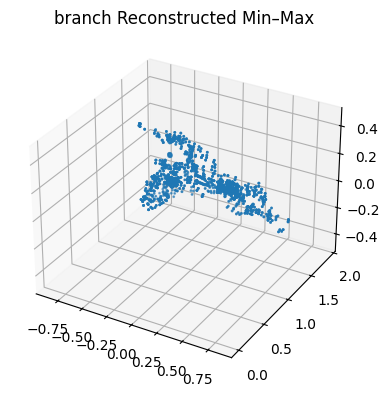

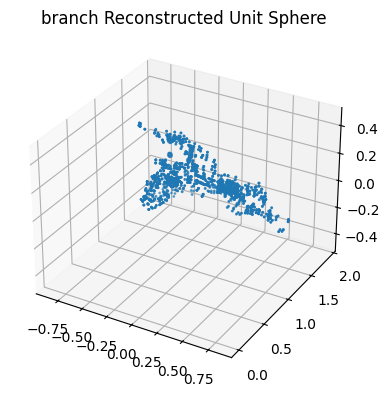


📂 Loaded: /content/unzipped_samples/8samples/fence.obj
Vertices: 1088
X[min,max,mean,std]: -0.5000, 0.5000, -0.0035, 0.3458
Y[min,max,mean,std]: -0.0000, 0.8432, 0.4105, 0.2540
Z[min,max,mean,std]: -0.0225, 0.0225, -0.0004, 0.0110


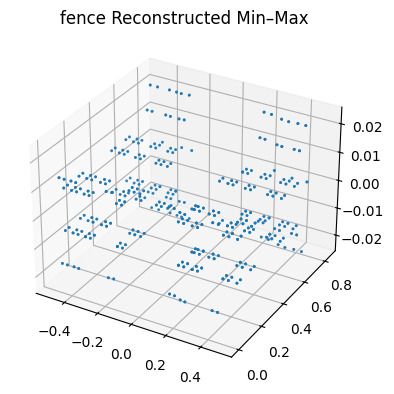

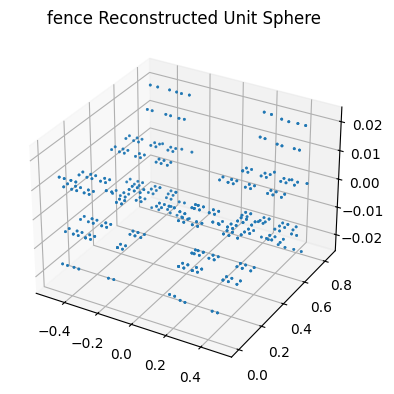


📂 Loaded: /content/unzipped_samples/8samples/girl.obj
Vertices: 8284
X[min,max,mean,std]: -0.5000, 0.5000, 0.0021, 0.1788
Y[min,max,mean,std]: 0.0000, 0.9044, 0.4034, 0.2144
Z[min,max,mean,std]: -0.1814, 0.1814, 0.0140, 0.0618


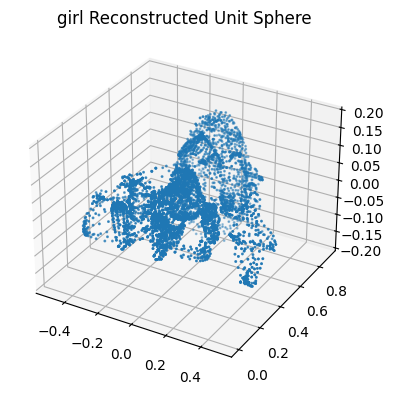

Mesh      Method           MSE
0      person      MinMax  7.891146e-07
1      person  UnitSphere  1.763107e-06
2      talwar      MinMax  1.307101e-07
3      talwar  UnitSphere  5.845993e-07
4       table      MinMax  1.488113e-07
5       table  UnitSphere  4.699512e-07
6   explosive      MinMax  1.243818e-07
7   explosive  UnitSphere  3.901548e-07
8    cylinder      MinMax  7.966258e-07
9    cylinder  UnitSphere  2.573564e-06
10     branch      MinMax  7.815263e-07
11     branch  UnitSphere  2.339403e-06
12      fence      MinMax  1.570000e-07
13      fence  UnitSphere  3.607581e-07
14       girl      MinMax  2.054086e-07
15       girl  UnitSphere  3.521918e-07

In [6]:
def dequantize(q, n_bins=1024):
    return q / (n_bins - 1)

def denorm_minmax(vn, vmin, vmax):
    return vn * (vmax - vmin) + vmin

def denorm_unitsphere(vn, center, scale):
    return (vn * scale) + center

def mse(a, b): return np.mean((a - b)**2)

errors = []

for m in meshes:
    mesh, verts = load_mesh(m)
    name = os.path.splitext(os.path.basename(m))[0]

    # Min–Max
    v_norm, vmin, vmax = minmax_normalize(verts)
    q = quantize(v_norm)
    v_rec = denorm_minmax(dequantize(q), vmin, vmax)
    err = mse(verts, v_rec)
    errors.append([name, "MinMax", err])
    visualize(v_rec, f"{name} Reconstructed Min–Max", os.path.join(viz_dir, f"{name}_recon_minmax.png"))

    # Unit Sphere
    v_norm2, center, scale = unit_sphere_normalize(verts)
    q2 = quantize((v_norm2 + 1)/2)
    v_rec2 = denorm_unitsphere((dequantize(q2)*2)-1, center, scale)
    err2 = mse(verts, v_rec2)
    errors.append([name, "UnitSphere", err2])
    visualize(v_rec2, f"{name} Reconstructed Unit Sphere", os.path.join(viz_dir, f"{name}_recon_unitsphere.png"))

df = pd.DataFrame(errors, columns=["Mesh", "Method", "MSE"])
df.to_csv(os.path.join(base_dir, "reconstruction_errors.csv"), index=False)
df.plot(x="Mesh", y="MSE", kind="bar", color="teal", title="Reconstruction Error per Mesh")
plt.tight_layout()
plt.savefig(os.path.join(viz_dir, "reconstruction_error_plot.png"), dpi=150)
plt.show()
df


#Bonus Option 1: Seam Tokenization Prototype

In [7]:
def seam_tokenize(mesh):
    edges = mesh.edges_unique
    edges_sharp = mesh.edges_sorted[::10]
    tokens = [f"S{idx}" for idx,_ in enumerate(edges_sharp)]
    return tokens

mesh_example = trimesh.load(meshes[0])
tokens = seam_tokenize(mesh_example)

print("🔗 Example seam tokens:", tokens[:10])
print("Decoded representation example:", tokens[:5])


🔗 Example seam tokens: ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
Decoded representation example: ['S0', 'S1', 'S2', 'S3', 'S4']


#Bonus Option 2: Rotation Invariance & Adaptive Quantization


📂 Loaded: /content/unzipped_samples/8samples/person.obj
Vertices: 3103
X[min,max,mean,std]: -0.8438, 0.8418, 0.0049, 0.3951
Y[min,max,mean,std]: -0.0000, 1.9004, 1.1595, 0.5119
Z[min,max,mean,std]: -0.2129, 0.2109, -0.0036, 0.0951

📂 Loaded: /content/unzipped_samples/8samples/talwar.obj
Vertices: 1668
X[min,max,mean,std]: -0.0319, 0.0319, 0.0217, 0.0112
Y[min,max,mean,std]: 0.0000, 1.0000, 0.3028, 0.2369
Z[min,max,mean,std]: -0.1171, 0.1171, -0.0044, 0.0468

📂 Loaded: /content/unzipped_samples/8samples/table.obj
Vertices: 3148
X[min,max,mean,std]: -0.2089, 0.2089, -0.0132, 0.1531
Y[min,max,mean,std]: -0.0000, 0.6118, 0.3864, 0.1919
Z[min,max,mean,std]: -0.5000, 0.5000, -0.0036, 0.3461

📂 Loaded: /content/unzipped_samples/8samples/explosive.obj
Vertices: 2812
X[min,max,mean,std]: -0.1996, 0.1996, 0.0429, 0.1151
Y[min,max,mean,std]: -0.0000, 1.0000, 0.5291, 0.3899
Z[min,max,mean,std]: -0.1971, 0.1971, -0.0034, 0.0947

📂 Loaded: /content/unzipped_samples/8samples/cylinder.obj
Vertices: 1

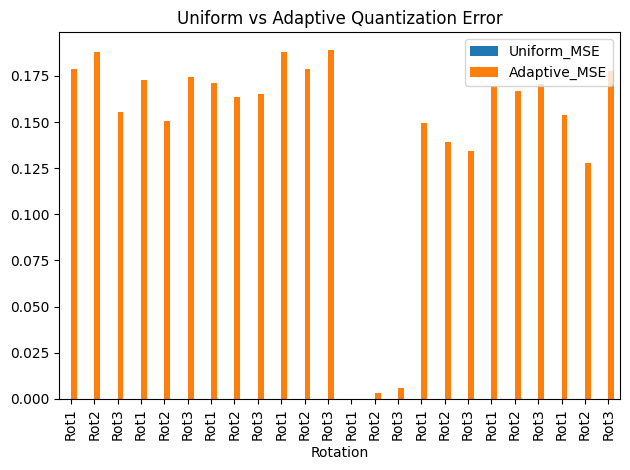

Mesh Rotation   Uniform_MSE  Adaptive_MSE
0      person     Rot1  6.072043e-07      0.178934
1      person     Rot2  5.475275e-07      0.188212
2      person     Rot3  7.134733e-07      0.155581
3      talwar     Rot1  1.079861e-07      0.172523
4      talwar     Rot2  1.108142e-07      0.150770
5      talwar     Rot3  1.149390e-07      0.174549
6       table     Rot1  3.002963e-07      0.171363
7       table     Rot2  2.930859e-07      0.163435
8       table     Rot3  3.249851e-07      0.165245
9   explosive     Rot1  1.772477e-07      0.187715
10  explosive     Rot2  1.490217e-07      0.178952
11  explosive     Rot3  1.750694e-07      0.189165
12   cylinder     Rot1  2.025387e-06      0.000018
13   cylinder     Rot2  2.079407e-06      0.003098
14   cylinder     Rot3  1.969534e-06      0.005706
15     branch     Rot1  7.703682e-07      0.149715
16     branch     Rot2  7.955691e-07      0.139143
17     branch     Rot3  8.633118e-07      0.134195
18      fence     Rot1  2.633529e-07      0.169724
19      fence     Rot2  3.022856e-07      0.166719
20      fence     Rot3  2.603268e-07      0.170879
21       girl     Rot1  2.002594e-07      0.153683
22       girl     Rot2  2.041538e-07      0.127792
23       girl     Rot3  2.028404e-07      0.177777

In [10]:
def random_rotate(vertices):
    R = trimesh.transformations.random_rotation_matrix()[:3,:3]
    return vertices @ R.T

def adaptive_quantization(vertices, base_bins=1024):
    nbrs = NearestNeighbors(n_neighbors=5).fit(vertices)
    distances, _ = nbrs.kneighbors(vertices)
    density = 1 / (np.mean(distances, axis=1) + 1e-6)
    scaled_bins = np.clip((density / density.max()) * base_bins, 256, 2048)
    quantized = np.floor(vertices * (scaled_bins[:,None]-1))
    return quantized

errs_rot = []
for m in meshes[:8]:  # sample 2 for speed
    mesh, verts = load_mesh(m)
    name = os.path.splitext(os.path.basename(m))[0]

    for i in range(3):
        v_rot = random_rotate(verts)
        v_norm, vmin, vmax = minmax_normalize(v_rot)
        q_uni = quantize(v_norm)
        v_rec_uni = denorm_minmax(dequantize(q_uni), vmin, vmax)
        err_uni = mse(v_rot, v_rec_uni)

        q_adp = adaptive_quantization(v_norm)
        v_rec_adp = dequantize(q_adp)
        err_adp = mse(v_norm, v_rec_adp)

        errs_rot.append([name, f"Rot{i+1}", err_uni, err_adp])

df_bonus = pd.DataFrame(errs_rot, columns=["Mesh","Rotation","Uniform_MSE","Adaptive_MSE"])
df_bonus.to_csv(os.path.join(base_dir,"adaptive_quantization_results.csv"), index=False)

df_bonus.plot(x="Rotation", y=["Uniform_MSE","Adaptive_MSE"], kind="bar", title="Uniform vs Adaptive Quantization Error")
plt.tight_layout()
plt.savefig(os.path.join(viz_dir, "adaptive_vs_uniform_error.png"), dpi=150)
plt.show()
df_bonus


In [11]:
zip_path = "/content/Mesh_Assignment_Submission.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as z:
    for folder, _, files in os.walk(base_dir):
        for f in files:
            fp = os.path.join(folder, f)
            z.write(fp, os.path.relpath(fp, base_dir))

print("✅ All results saved and zipped successfully!")
print("📦 Final ZIP:", zip_path)


✅ All results saved and zipped successfully!
📦 Final ZIP: /content/Mesh_Assignment_Submission.zip
